# Masinsko ucenje - Projekat 1

Sanja Milenkovic 1549

Klasifikacija: Odredjivanje zrna pirinca na osnovu karakteristika

Dataset: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from statistics import mean
from scipy.stats import uniform


import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('rice_dataset.csv')
dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


In [4]:
dataset.shape

(3810, 8)

# 1. Priprema podataka

In [5]:
class_attribute = "Class"
main_column = dataset.Class

In [6]:
dataset.count()

Area                 3810
Perimeter            3810
Major_Axis_Length    3810
Minor_Axis_Length    3810
Eccentricity         3810
Convex_Area          3810
Extent               3810
Class                3810
dtype: int64

In [7]:
dataset.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

Zakljucak: nema praznih polja u datasetu

In [8]:
duplicates = dataset.duplicated()
print('Number of duplicates', duplicates.sum())

Number of duplicates 0


In [9]:
main_column.value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

<Axes: xlabel='Class'>

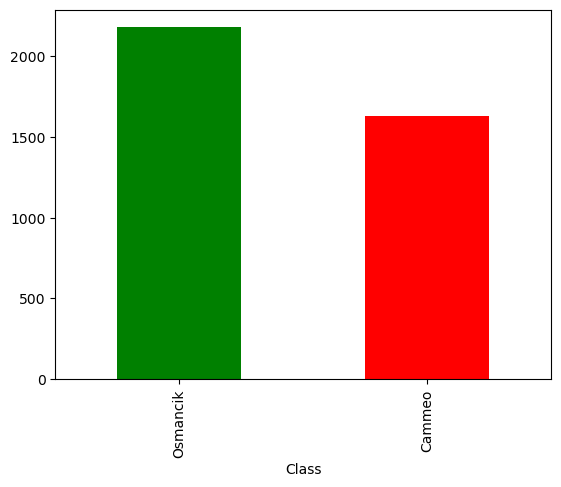

In [10]:
main_column.value_counts().plot(kind="bar", color=['green', 'red'])

Zakljucak : dataset dobro balansiran

In [11]:
dataset[class_attribute] = [0 if name=='Osmancik' else 1 for name in dataset.get(class_attribute)]

Mapiranje klase: 
0 - Osmancik ;
1 - Cammeo

In [12]:
dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,1
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,1
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,1
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,1
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,1


<Axes: xlabel='Class'>

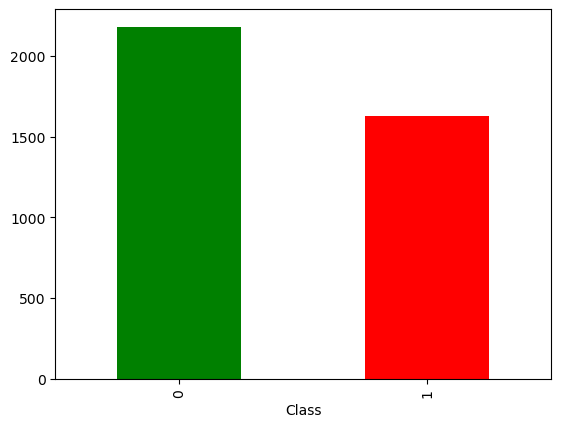

In [13]:
dataset.Class.value_counts().plot(kind="bar", color=['green', 'red'])

# 2. Deskriptivna analiza

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 238.3 KB


In [15]:
print(dataset.median()) #srednja vrednost, kada su atributi srotirani

Area                 12421.500000
Perimeter              448.852493
Major_Axis_Length      185.810059
Minor_Axis_Length       86.434647
Eccentricity             0.889050
Convex_Area          12706.500000
Extent                   0.645361
Class                    0.000000
dtype: float64


In [16]:
print(dataset.var())

Area                 3.001098e+06
Perimeter            1.267152e+03
Major_Axis_Length    3.044564e+02
Minor_Axis_Length    3.283081e+01
Eccentricity         4.333739e-04
Convex_Area          3.157630e+06
Extent               5.965828e-03
Class                2.448545e-01
dtype: float64


In [17]:
print(dataset.skew())

Area                 0.325158
Perimeter            0.221362
Major_Axis_Length    0.260242
Minor_Axis_Length   -0.134897
Eccentricity        -0.449249
Convex_Area          0.319782
Extent               0.343819
Class                0.291885
dtype: float64


In [18]:
dataset.describe(include='all',).transpose()

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050
Class,3810.0,0.427822,0.494828,0.000000,0.000000,0.000000,1.000000,1.000000


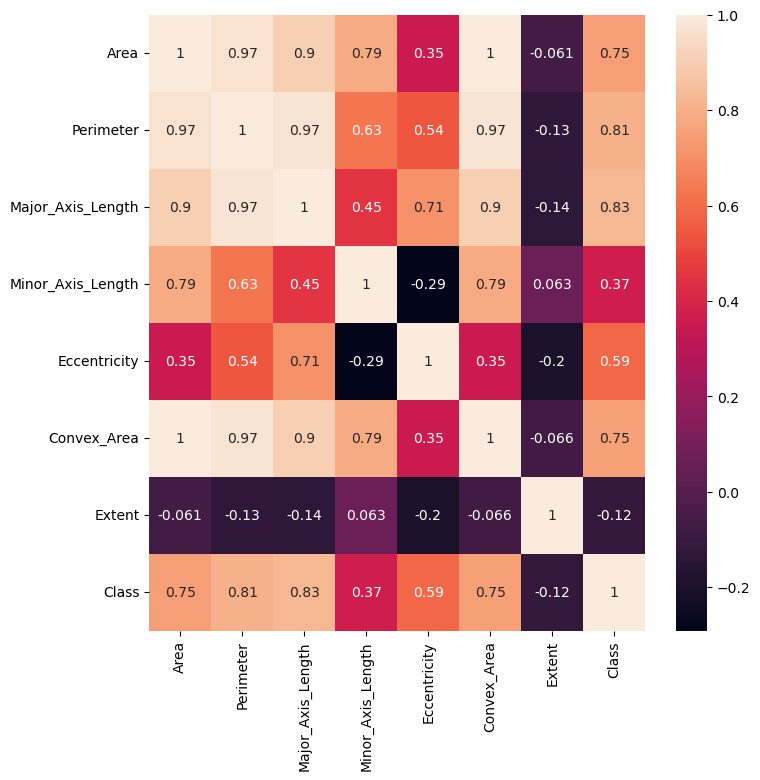

In [19]:
corr = dataset.corr()
plt.subplots(figsize=(8, 8))
sn.heatmap(corr, annot=True)
plt.show()

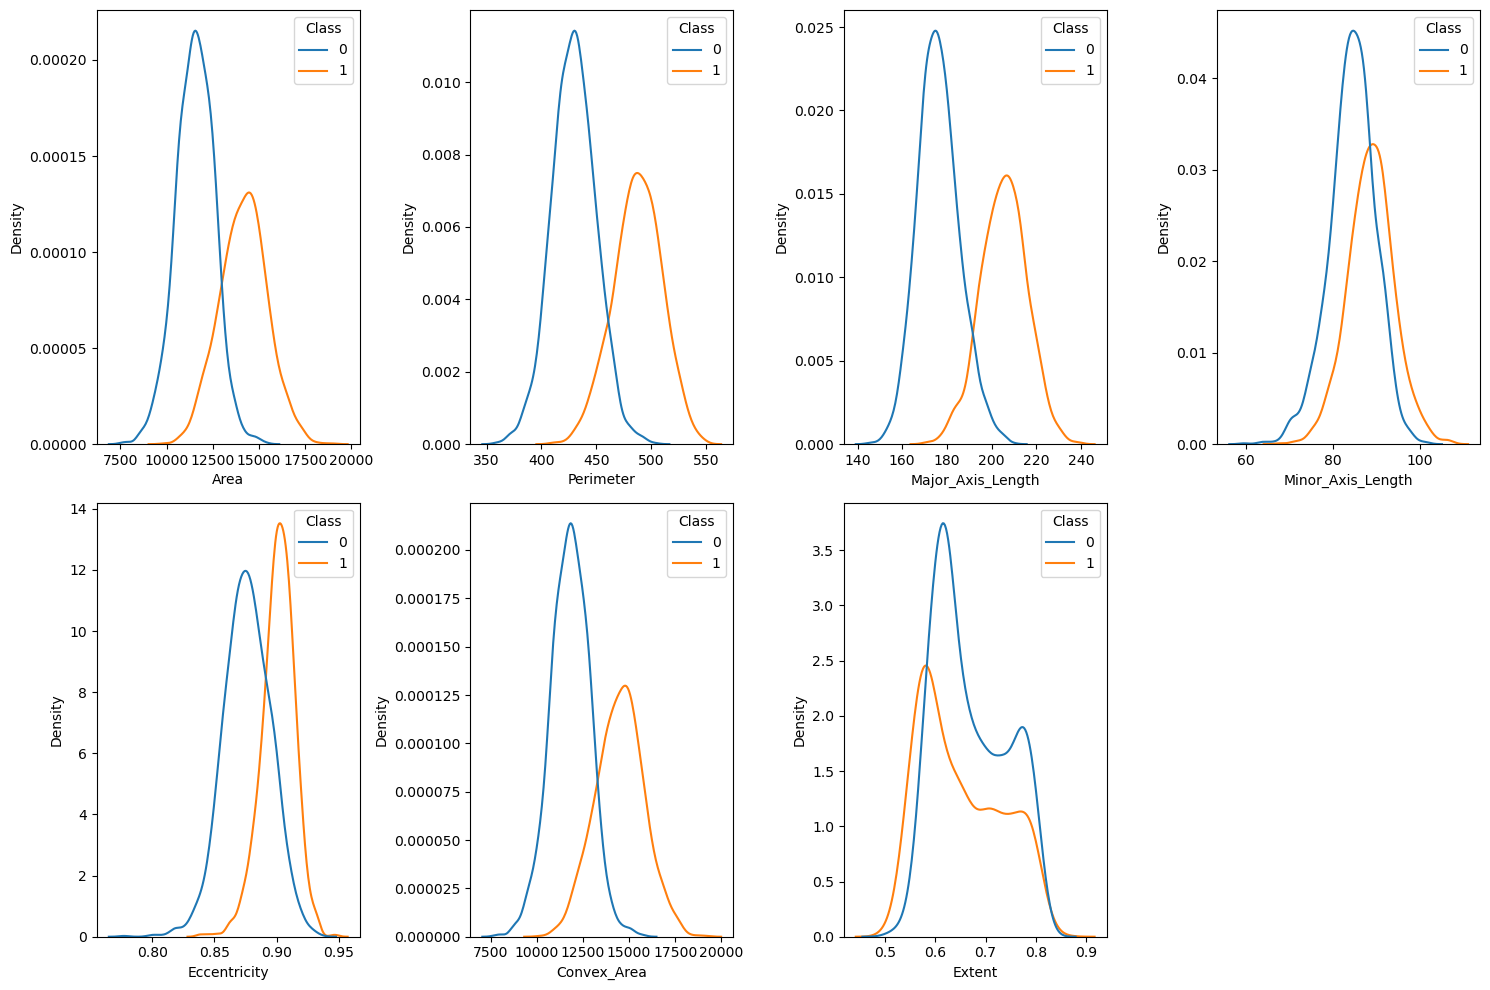

In [20]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(dataset.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sn.kdeplot(x=dataset[column], hue=dataset[class_attribute])
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

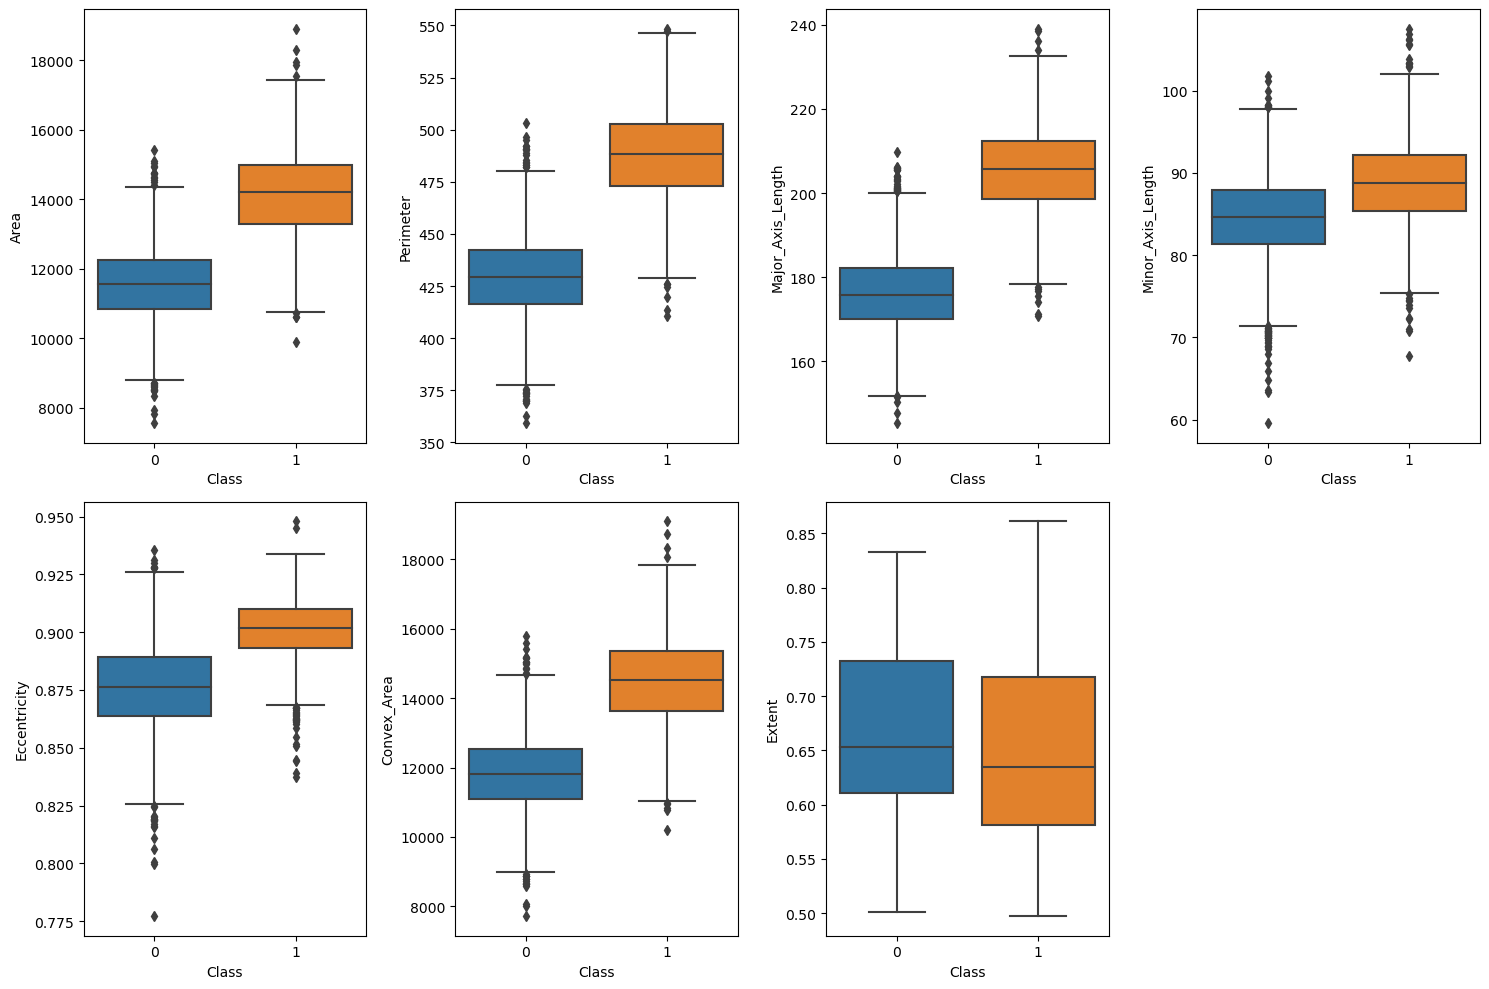

In [21]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(dataset.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sn.boxplot(x = dataset[class_attribute], y = dataset[column])
    plt.tight_layout()

plt.show()

Svaki od atributa ima outliere.

Zakljucujemo da postoji jasna razlika izmedju dve grupe podataka - osim za atribut Minor_Axis_Length, nema preklapanja vrednosti 

In [22]:
def remove_outliers(dataset, column_names, th1=0.25, th3=0.75):
    dataset_no_outliers = dataset.copy()  # Make a copy of the dataset to avoid modifying the original

    for column_name in column_names:
        # Extract the specified feature
        feature = dataset_no_outliers[column_name]

        q11 = feature.quantile(th1)
        q33 = feature.quantile(th3)

        # Calculate quartiles and IQR
        iqr = q33 - q11
        lower_bound = q11 - (iqr * 1.5)
        upper_bound = q33 + (iqr * 1.5)

        # Identify outliers
        boolean_outliers = (feature > upper_bound) | (feature < lower_bound)

        # Remove outliers from the dataset
        dataset_no_outliers = dataset_no_outliers[~boolean_outliers]

    return dataset_no_outliers

In [23]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 2 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 2 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def remove_ouliers_standard_deviation (dataset, column_names) :
    no_copy = dataset.copy()

    for column in column_names :
        lb, ub = determine_outlier_thresholds_std(dataset, column)
        outliers = (dataset[column] > ub) | (dataset[column] < lb)
        no_copy = no_copy[~outliers]

    return no_copy

In [24]:
dataset_without_outliers = remove_outliers(dataset, dataset.columns)

print("Dataset: ", dataset.shape)
print("Dataset without outliers: ", dataset_without_outliers.shape)

Dataset:  (3810, 8)
Dataset without outliers:  (3724, 8)


In [25]:
dataset_without_outliers_sd = remove_ouliers_standard_deviation(dataset, dataset.columns)

print("Dataset: ", dataset.shape)
print("Dataset without outliers with standard deviation: ", dataset_without_outliers_sd.shape)

Dataset:  (3810, 8)
Dataset without outliers with standard deviation:  (3403, 8)


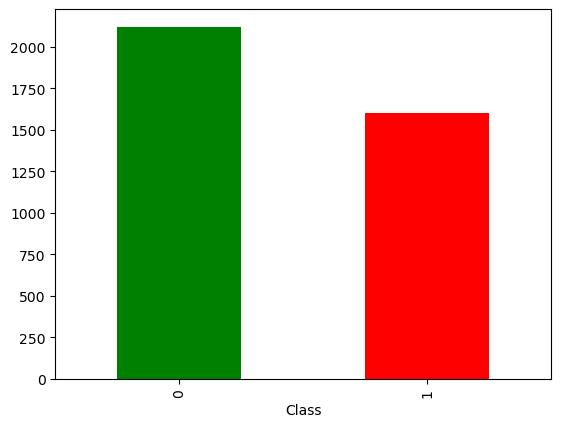

In [28]:
dataset_without_outliers.Class.value_counts().plot(kind="bar", color=['green', 'red'])
plt.show()

Majority:  2180
Minority:  1630


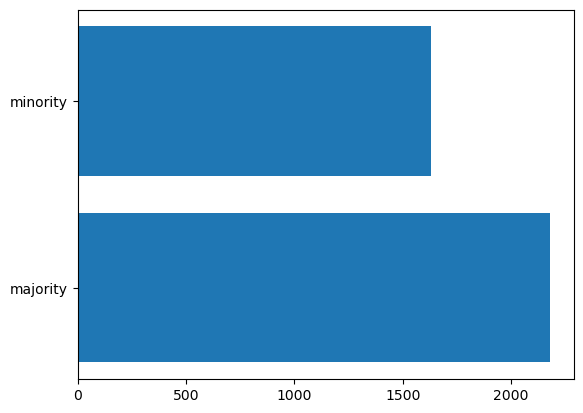

In [29]:
majority_count, minority_count = dataset[class_attribute].value_counts()
plt.barh(["majority", "minority"], [majority_count, minority_count])
print("Majority:  "+ str(majority_count)) #0
print("Minority:  "+ str(minority_count))

0:  2180
1:  2180


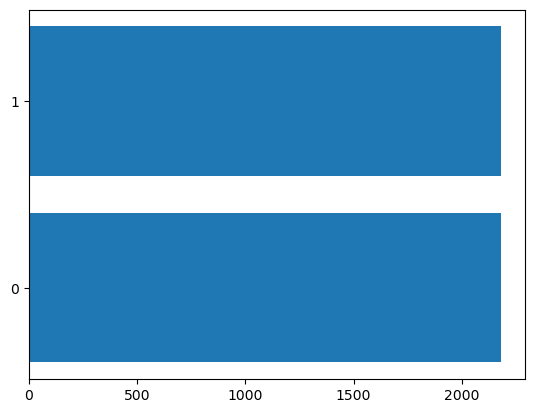

In [31]:
from sklearn.utils import resample

minority_class = dataset[dataset[class_attribute] == 1]
majority_class  = dataset[dataset[class_attribute] == 0]

minor_upsampled = resample(minority_class, replace=True, n_samples=majority_count, random_state=42)
dataset_upsampled = pd.concat([majority_class, minor_upsampled])
type_0, type_1 = dataset_upsampled[class_attribute].value_counts()

plt.barh(["0","1"], [type_0, type_1])
print("0:  "+ str(type_0))
print("1:  "+ str(type_1))

# TEST AND TRAIN DATA

In [32]:
class_names = ['Cammeo', 'Osmancik']

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split

def split_test_and_train_data (dataset) : 

    x = dataset.drop(class_attribute, axis=1).values
    y = dataset[class_attribute].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

    return x_train, x_test, y_train, y_test

In [34]:
x_train_imbalanced, x_test_imbalanced, y_train_imbalanced, y_test_imbalanced = split_test_and_train_data(dataset)

In [35]:
x_train_up, x_test_up, y_train_up, y_test_up = split_test_and_train_data(dataset_upsampled)

In [36]:
x_train_no_outl, x_test_no_outl, y_train_no_outl, y_test_no_outl = split_test_and_train_data(dataset_without_outliers)

In [37]:
x_train_std, x_test_std, y_train_std, y_test_std = split_test_and_train_data(dataset_without_outliers_sd)

In [38]:
# Matrice konfuzije
def matrix_confusion(matrix):
    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

    # Create heatmap
    sn.heatmap(dataframe, annot=True, cbar=None)

    plt.title("Confusion Matrix")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")

    plt.show()    

In [39]:
from yellowbrick.classifier import ClassificationReport

def visualize_results(model, x_train, y_train, x_test, y_test) :
    
    visualizer = ClassificationReport(model, classes=class_names)
    visualizer.fit(x_train, y_train) 
    visualizer.score(x_test, y_test)
    visualizer.show()

In [40]:
from sklearn.metrics import roc_curve, auc

# Plot AUC-ROC Curve
def auc_roc_plot(test, prediction):
    fpr, tpr, threshold = roc_curve(test, prediction)
    roc_auc = auc(fpr, tpr)

    plt.title('AUC-ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

def Naive_Bayes_train_and_predict(x_train, y_train, x_test, y_test) :
 
    #create an object of the type GaussianNB
    gnb = GaussianNB()
    #train the algorithm on training data and predict using the testing data
    pred = gnb.fit(x_train, y_train).predict(x_test)
    #print the accuracy score of the model
    print("Naive-Bayes accuracy: ", accuracy_score(y_test, pred, normalize = True))

    visualize_results(gnb, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix_confusion(confusion_matrix(y_test, pred))

    auc_roc_plot(y_test, pred)

    return accuracy_score(y_test, pred, normalize = True)
    

In [42]:
def cross_validate_nb (dataset) :
    scaler = StandardScaler()
    gnb = GaussianNB()

    # create a pipeline that standardizes, that runs LinearSVC
    pipeline = make_pipeline(scaler, gnb)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_res = cross_val_score(pipeline, dataset.drop("Class", axis=1).values, dataset["Class"].values, cv=kf, scoring="accuracy", n_jobs=-1)

    print(cv_res)
    print("Mean: ", cv_res.mean())

    return cv_res.mean()

Naive-Bayes accuracy:  0.9094488188976378


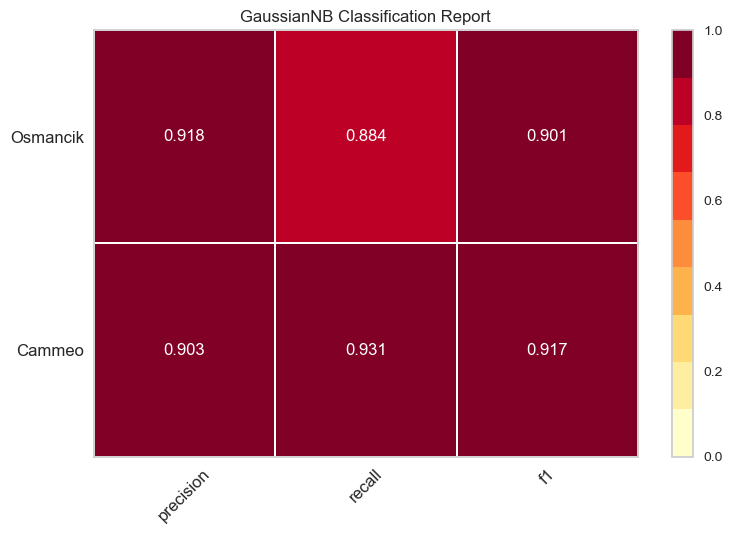

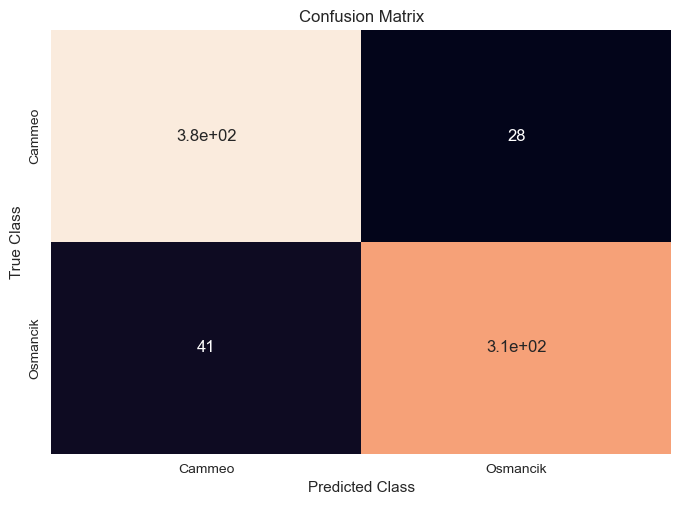

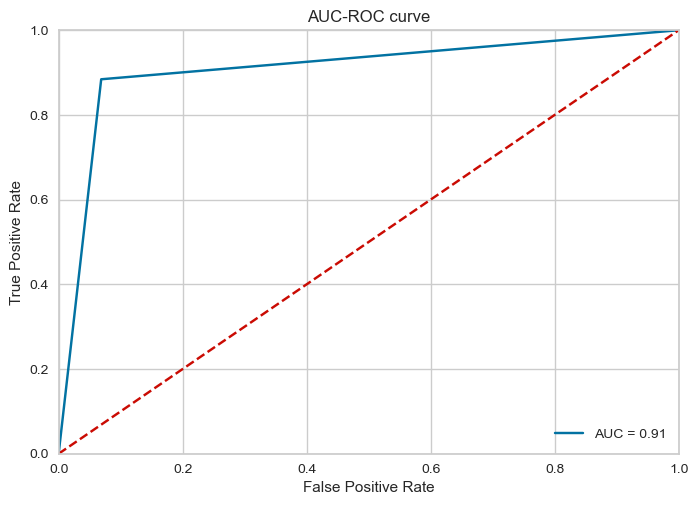

[0.92650919 0.90026247 0.91338583 0.92650919 0.91863517]
Mean:  0.9170603674540683


0.9170603674540683

In [43]:
imbalanced_acc = Naive_Bayes_train_and_predict(x_train_imbalanced, y_train_imbalanced, x_test_imbalanced, y_test_imbalanced)
cross_validate_nb(dataset)

Naive-Bayes accuracy:  0.912751677852349


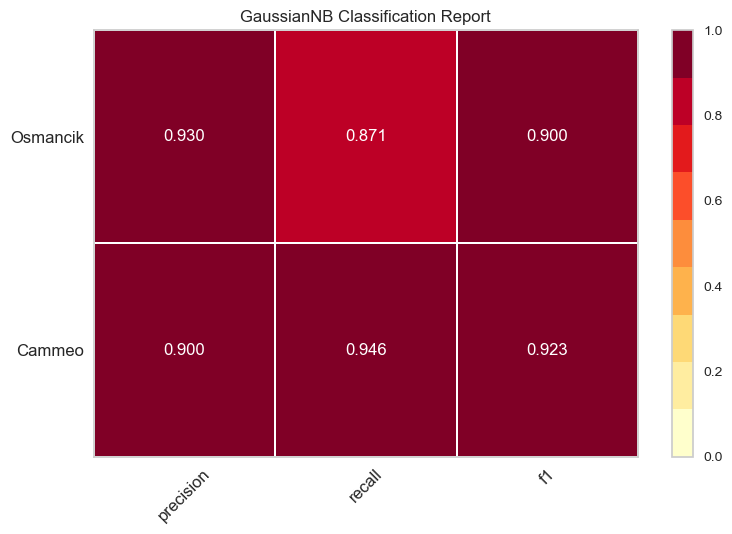

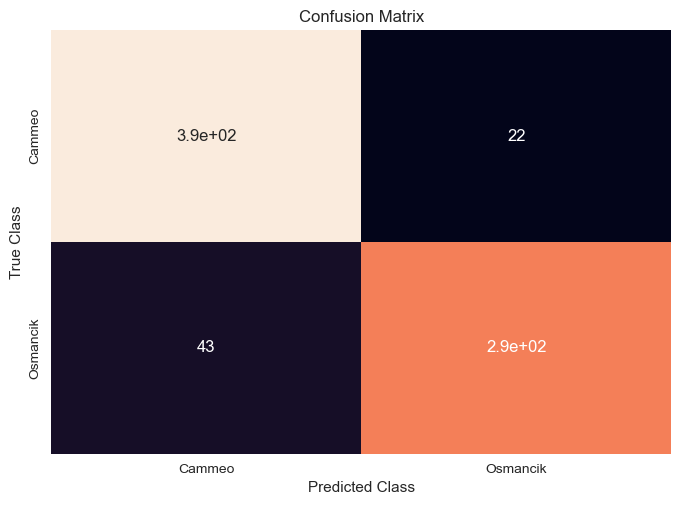

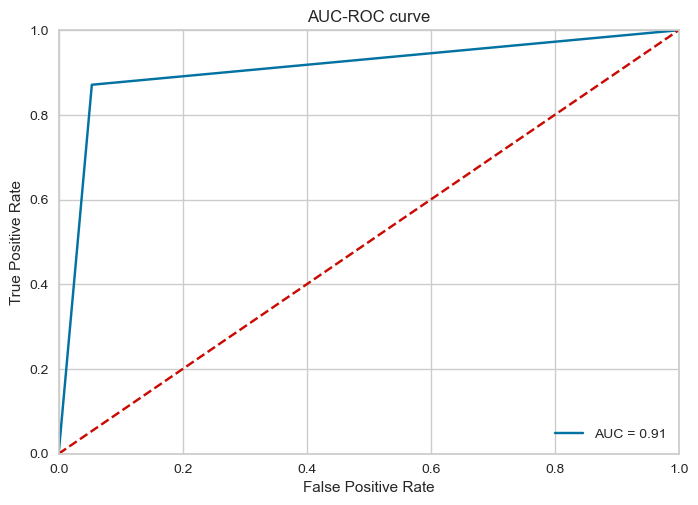

[0.88993289 0.92080537 0.92348993 0.93154362 0.91801075]
Mean:  0.9167565129537418


0.9167565129537418

In [45]:
no_outliers_acc = Naive_Bayes_train_and_predict(x_train_no_outl, y_train_no_outl, x_test_no_outl, y_test_no_outl)
cross_validate_nb(dataset_without_outliers)

Naive-Bayes accuracy:  0.8942731277533039


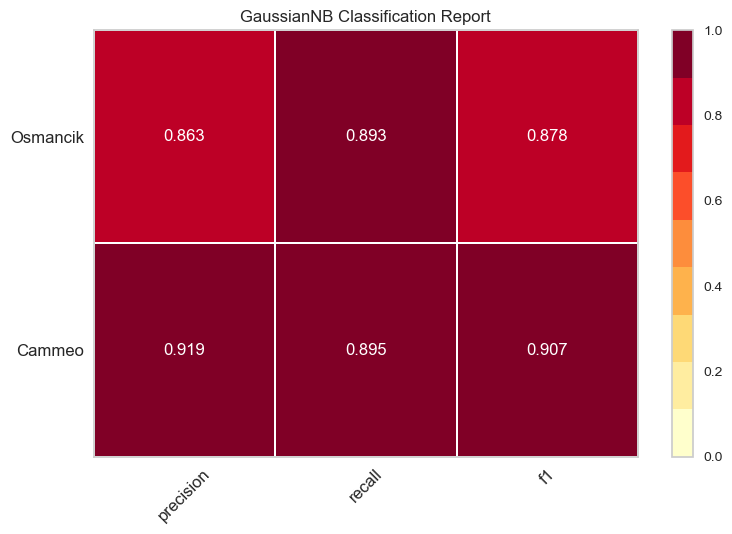

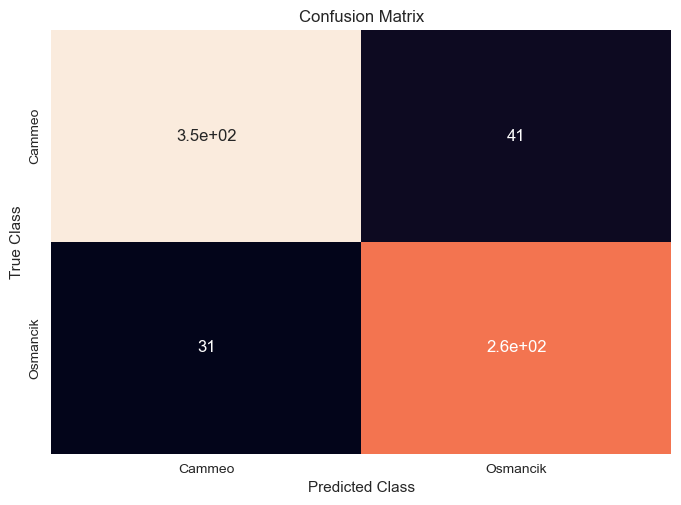

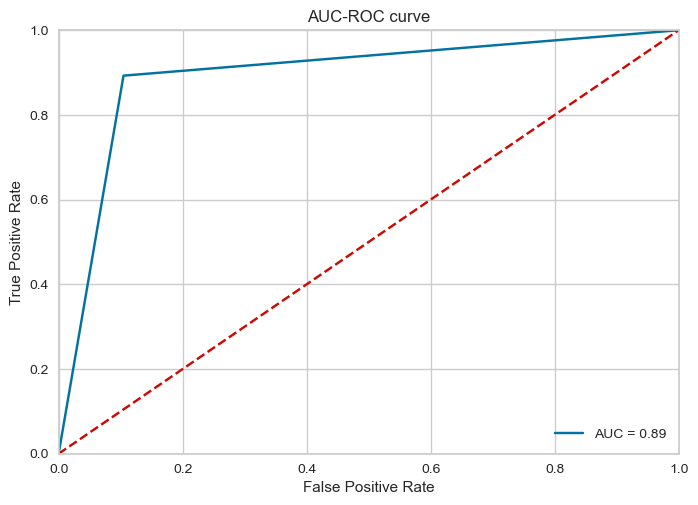

[0.90455213 0.92070485 0.92070485 0.89705882 0.91470588]
Mean:  0.9115453053468083


0.9115453053468083

In [46]:
no_outliers_std_acc = Naive_Bayes_train_and_predict(x_train_std, y_train_std, x_test_std, y_test_std)
cross_validate_nb(dataset_without_outliers_sd)

Naive-Bayes accuracy:  0.8956422018348624


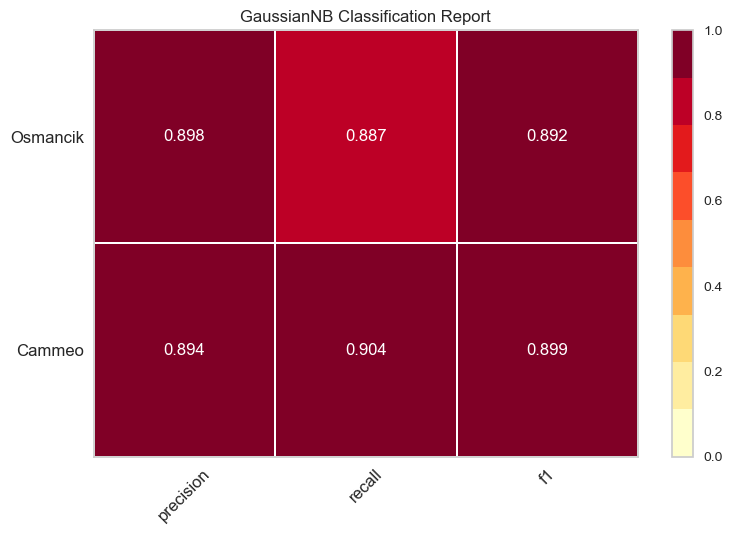

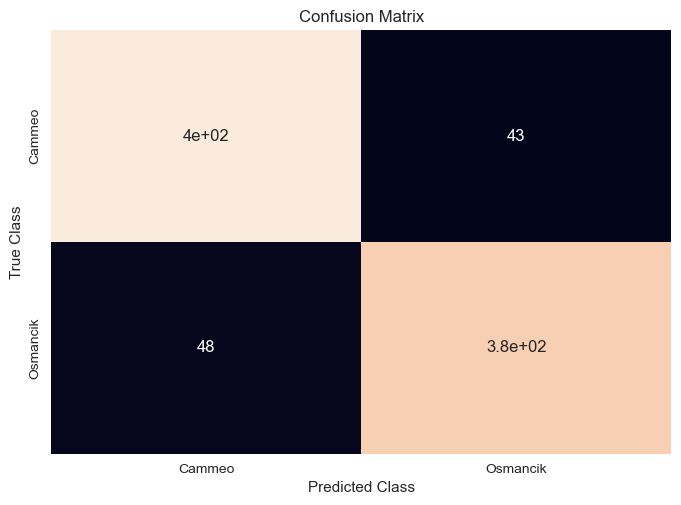

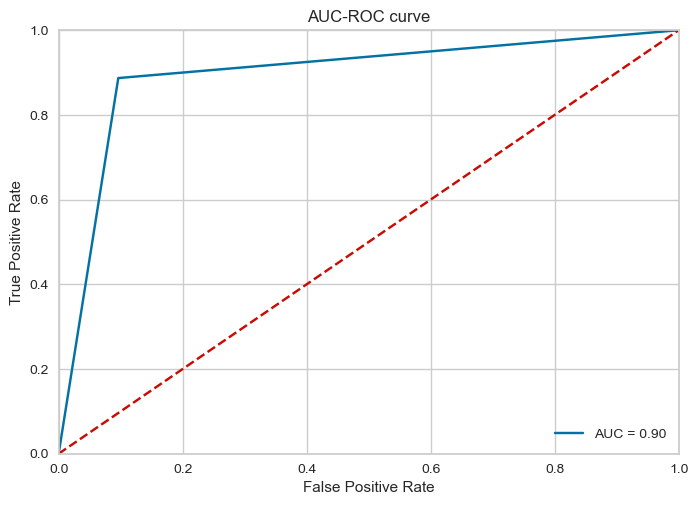

[0.91169725 0.90711009 0.9266055  0.90940367 0.91857798]
Mean:  0.9146788990825687


0.9146788990825687

In [44]:
upsampled_acc = Naive_Bayes_train_and_predict(x_train_up, y_train_up, x_test_up, y_test_up)
cross_validate_nb(dataset_upsampled)

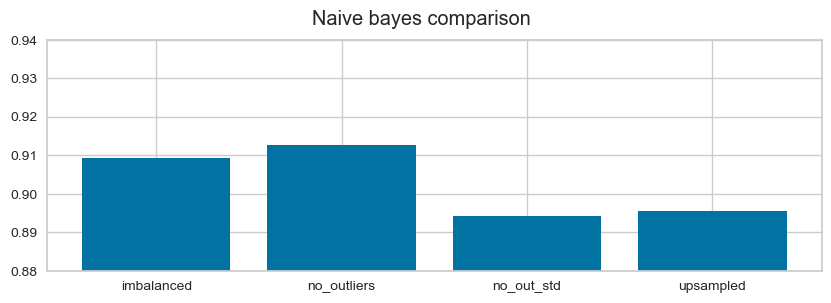

In [59]:
plt.figure(figsize=(10, 3))
plt.ylim(0.88, 0.94)
plt.bar(['imbalanced', 'no_outliers', 'no_out_std' , 'upsampled'], [imbalanced_acc, no_outliers_acc, no_outliers_std_acc, upsampled_acc])
plt.suptitle('Naive bayes comparison')
plt.show()

# Linear SVC

In [49]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def LinearSVC_train_and_test(x_train, y_train, x_test, y_test):
    #svc_model = LinearSVC(random_state=0)
    svc_model = LinearSVC(random_state=0, dual=False, C=1.0)
    # to do: ovo razradi da se poigras sa hiperparametrima

    #train the algorithm on training data and predict using the testing data
    pred = svc_model.fit(x_train, y_train).predict(x_test)

    #print the accuracy score of the model
    print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

    visualize_results(svc_model, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)


In [50]:
def cross_validate_linear (dataset) :
    scaler = StandardScaler()
    svc_model = LinearSVC()

    # create a pipeline that standardizes, that runs LinearSVC
    pipeline = make_pipeline(scaler, svc_model)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_res = cross_val_score(pipeline, dataset.drop(class_attribute, axis=1).values, dataset[class_attribute].values, cv=kf, scoring="accuracy", n_jobs=-1)

    print(cv_res)
    print("Mean: ", cv_res.mean())

    return cv_res.mean()
    

LinearSVC accuracy :  0.9291338582677166


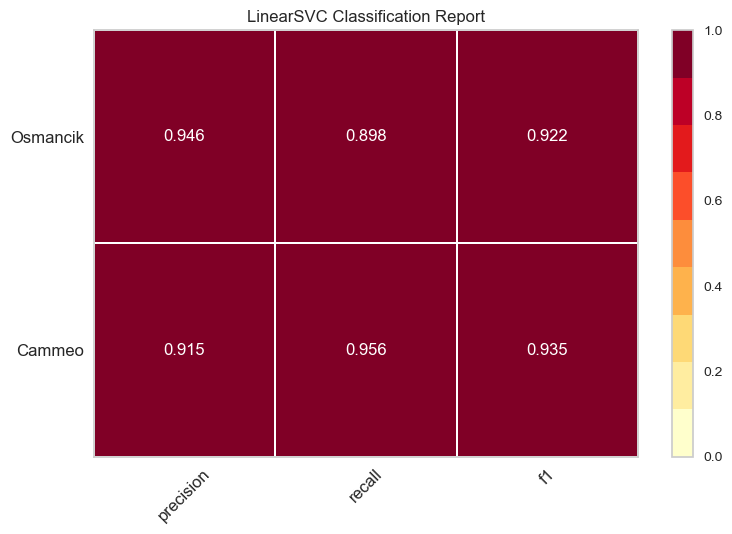

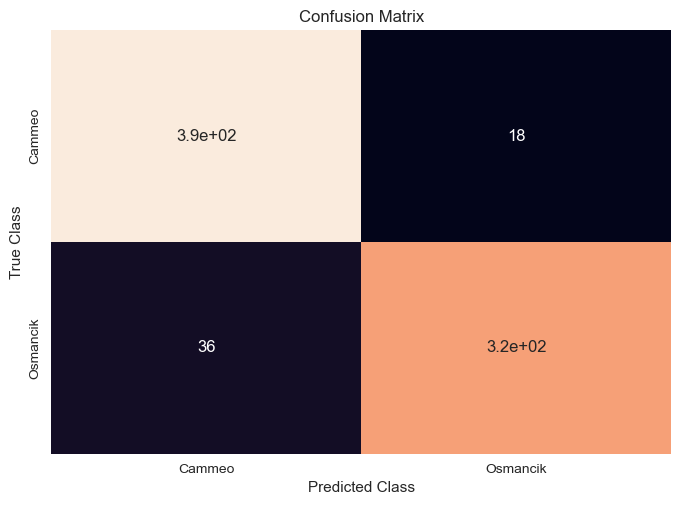

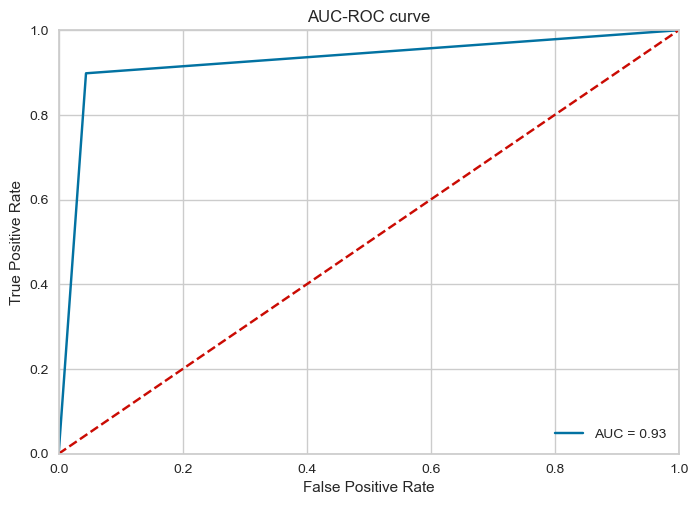

[0.93963255 0.91863517 0.93569554 0.92913386 0.9343832 ]
Mean:  0.931496062992126


In [51]:
LinearSVC_train_and_test(x_train_imbalanced, y_train_imbalanced, x_test_imbalanced, y_test_imbalanced)
cv_res_imbalanced = cross_validate_linear(dataset)

LinearSVC accuracy :  0.934228187919463


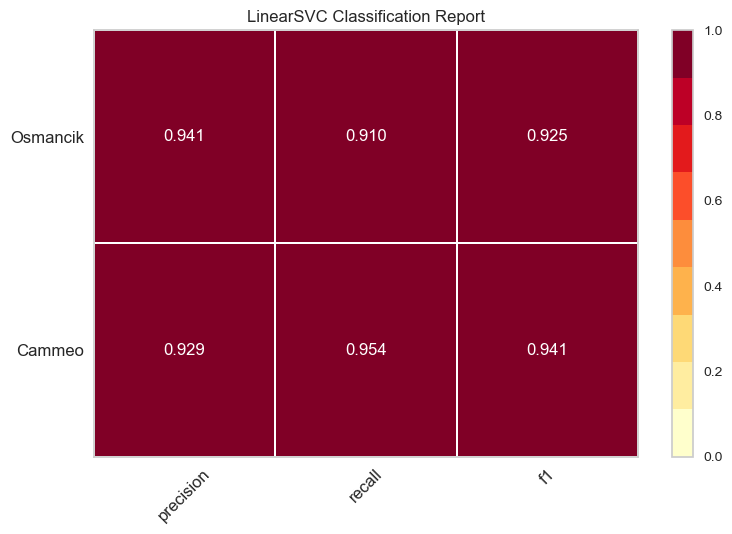

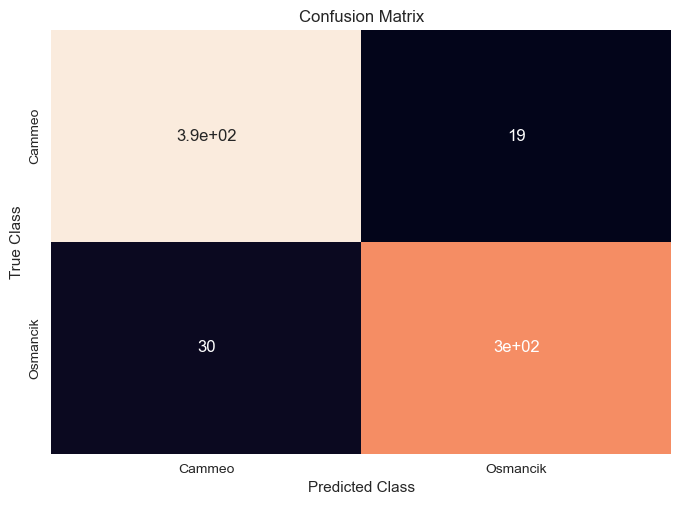

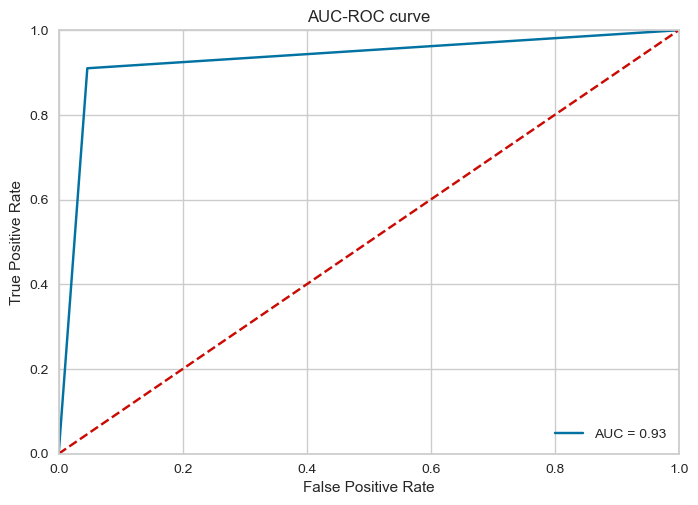

[0.91677852 0.91946309 0.93422819 0.94630872 0.9327957 ]
Mean:  0.9299148444829328


In [53]:
LinearSVC_train_and_test(x_train_no_outl, y_train_no_outl, x_test_no_outl, y_test_no_outl)
cv_res_no_outliers = cross_validate_linear(dataset_without_outliers)

LinearSVC accuracy :  0.9251101321585903


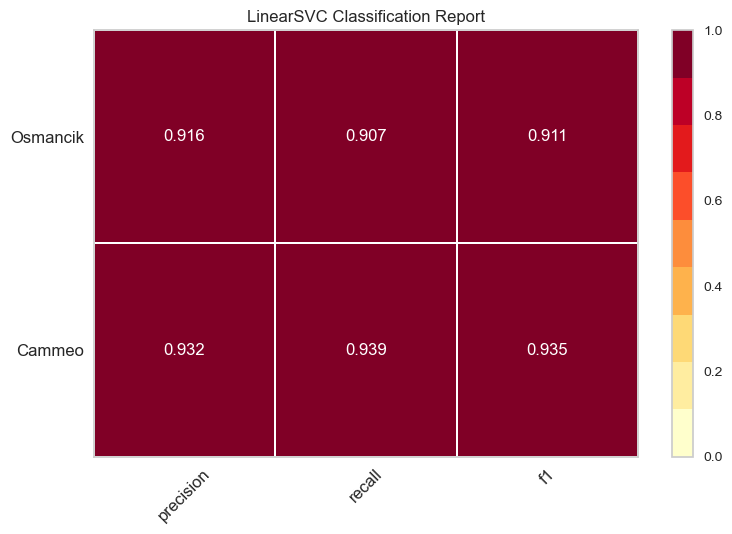

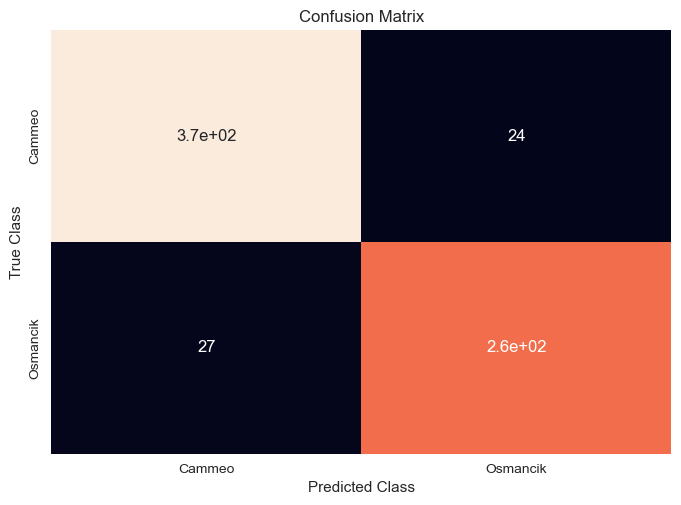

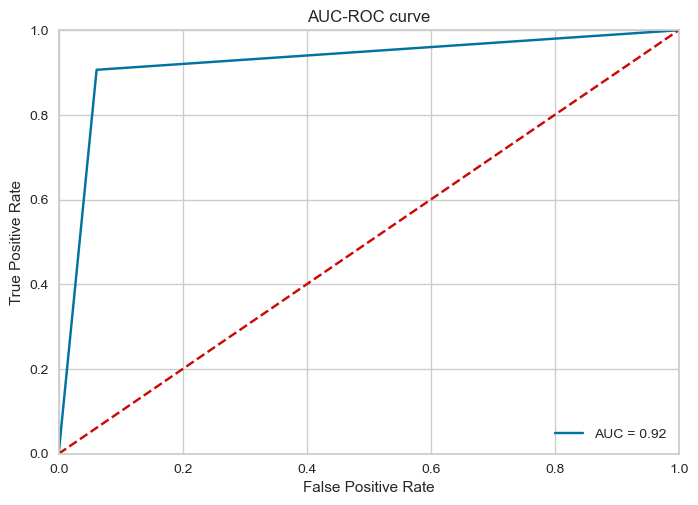

[0.91042584 0.94419971 0.92804699 0.91764706 0.92941176]
Mean:  0.9259462727822406


In [54]:
LinearSVC_train_and_test(x_train_std, y_train_std, x_test_std, y_test_std)
cv_res_outliers_std = cross_validate_linear(dataset_without_outliers_sd)

LinearSVC accuracy :  0.9243119266055045


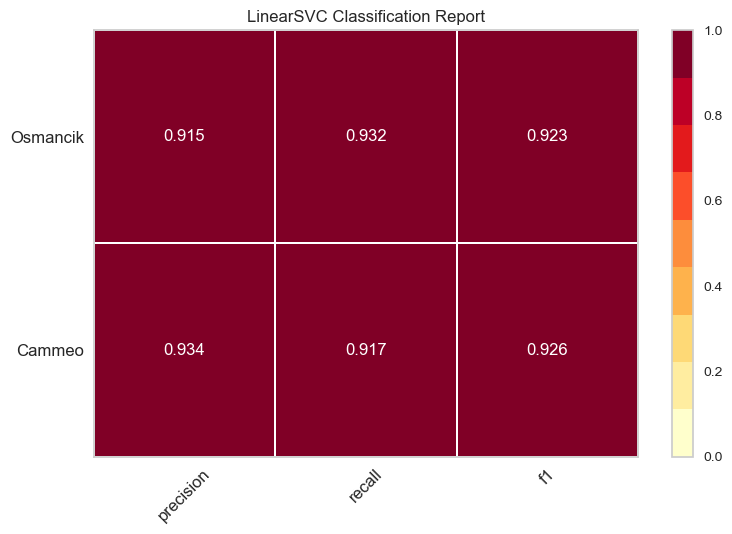

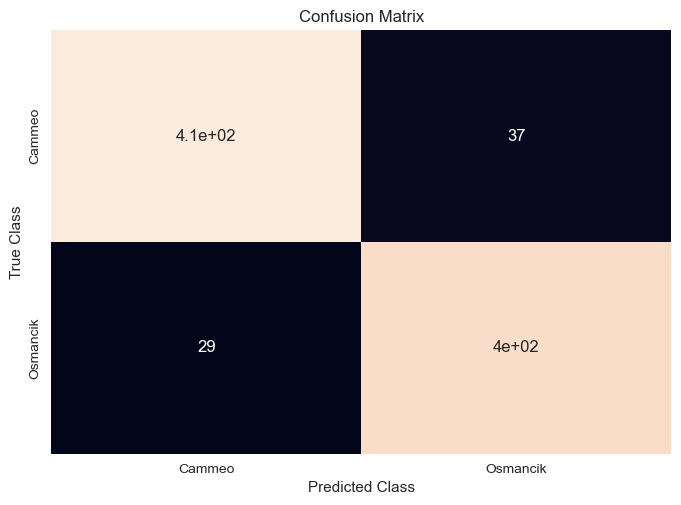

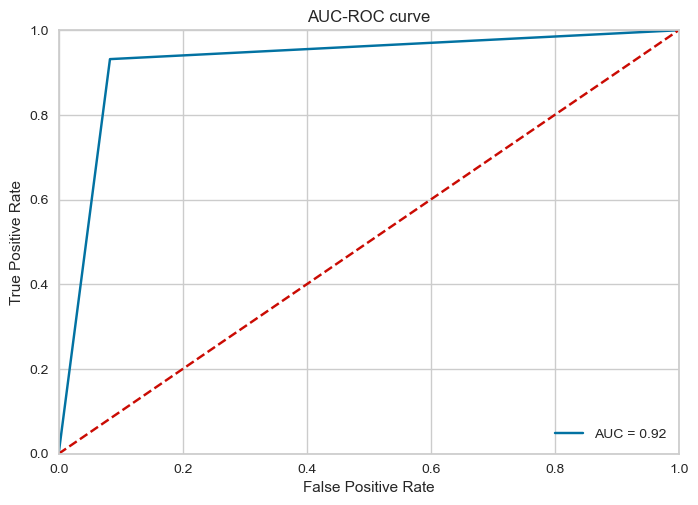

[0.91857798 0.93004587 0.93577982 0.92889908 0.93004587]
Mean:  0.9286697247706422


In [52]:
LinearSVC_train_and_test(x_train_up, y_train_up, x_test_up, y_test_up)
cv_res_upsampled = cross_validate_linear(dataset_upsampled)

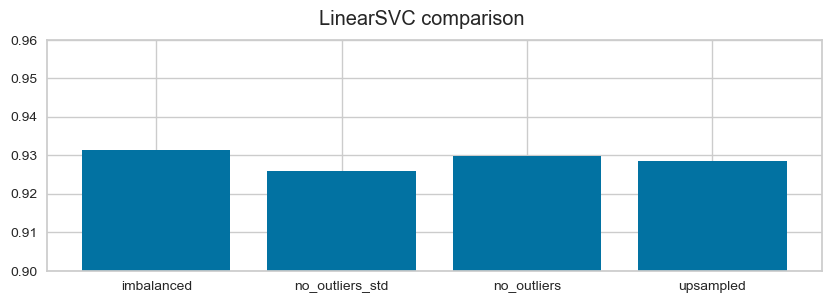

In [58]:

plt.figure(figsize=(10, 3))
plt.ylim(0.9, 0.96)
plt.bar(['imbalanced', 'no_outliers_std' , 'no_outliers',  'upsampled'], [cv_res_imbalanced, cv_res_outliers_std, cv_res_no_outliers, cv_res_upsampled])
plt.suptitle('LinearSVC comparison')
plt.show()

# KNN


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNN_train_and_prediction(x_train, y_train, x_test, y_test) : 
    #create object of the lassifier
    knn = KNeighborsClassifier(n_neighbors=2)
    #Train the algorithm
    knn.fit(x_train, y_train)
    # predict the response
    pred = knn.predict(x_test)
    # evaluate accuracy
    print ("KNN accuracy score : ",accuracy_score(y_test, pred))

    visualize_results(knn, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)


In [61]:
def cross_validate_knn (dataset) :
    scaler = StandardScaler()
    svc_model = KNeighborsClassifier(n_neighbors=2)

    # create a pipeline that standardizes, that runs LinearSVC
    pipeline = make_pipeline(scaler, svc_model)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_res = cross_val_score(pipeline, dataset.drop("Class", axis=1).values, dataset["Class"].values, cv=kf, scoring="accuracy", n_jobs=-1)

    print(cv_res)
    print("Mean: ", cv_res.mean())

    return cv_res.mean()

KNN accuracy score :  0.84251968503937


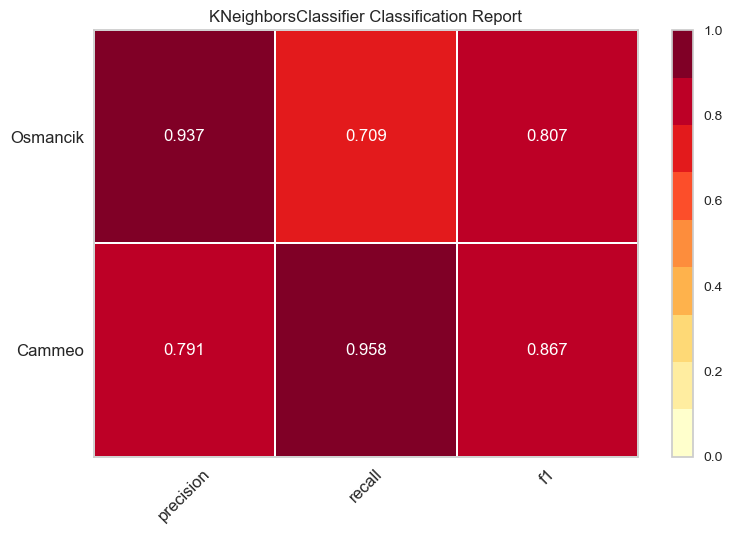

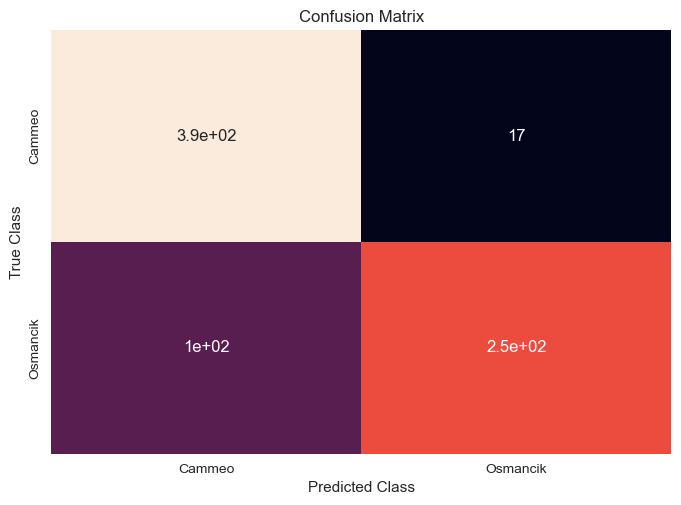

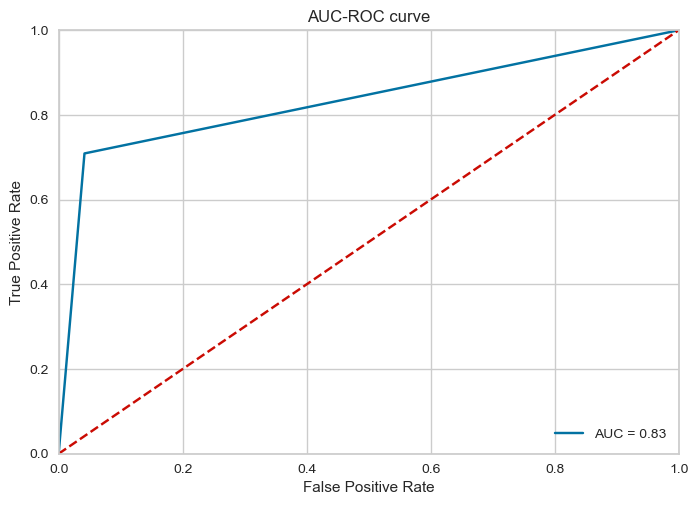

[0.90288714 0.88582677 0.88057743 0.89632546 0.88582677]
Mean:  0.8902887139107613


In [62]:
KNN_train_and_prediction(x_train_imbalanced, y_train_imbalanced, x_test_imbalanced, y_test_imbalanced)
knn_cv_res_imbalanced = cross_validate_knn(dataset)

KNN accuracy score :  0.8684563758389262


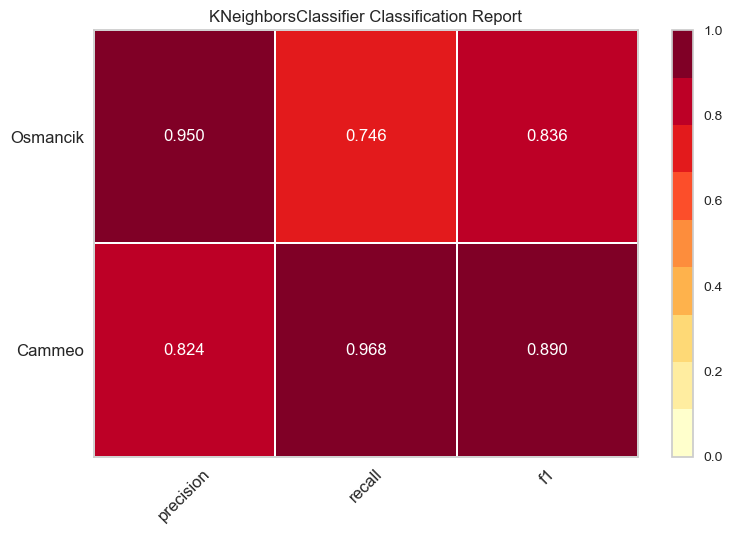

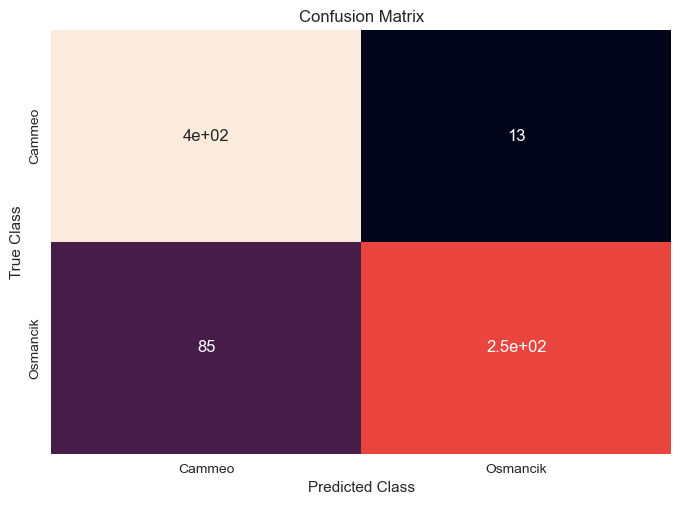

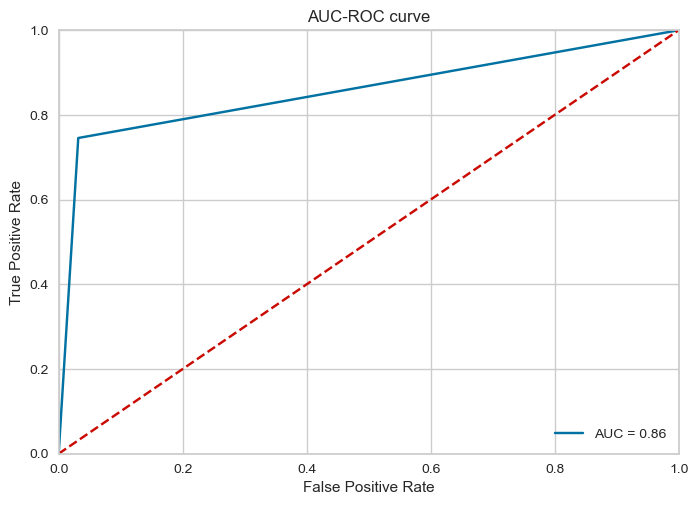

[0.8738255  0.88590604 0.89395973 0.89261745 0.88978495]
Mean:  0.8872187342137549


In [64]:
KNN_train_and_prediction(x_train_no_outl, y_train_no_outl, x_test_no_outl, y_test_no_outl)
knn_cv_res_no_outliers = cross_validate_knn(dataset_without_outliers)

KNN accuracy score :  0.8590308370044053


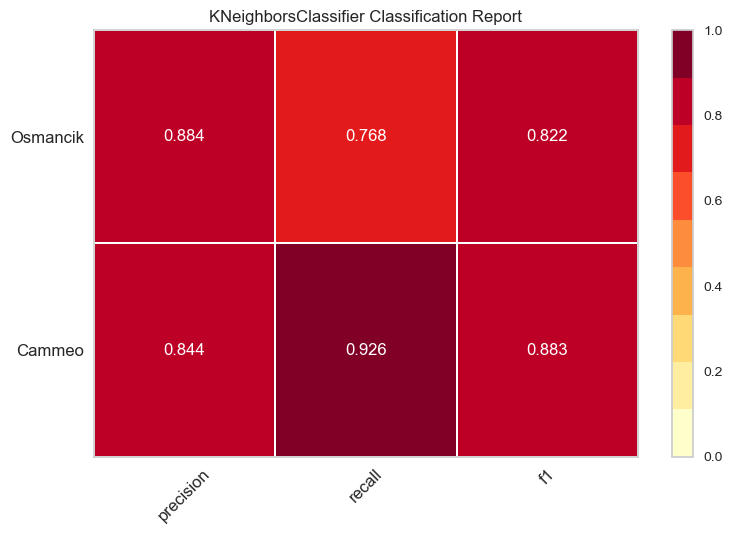

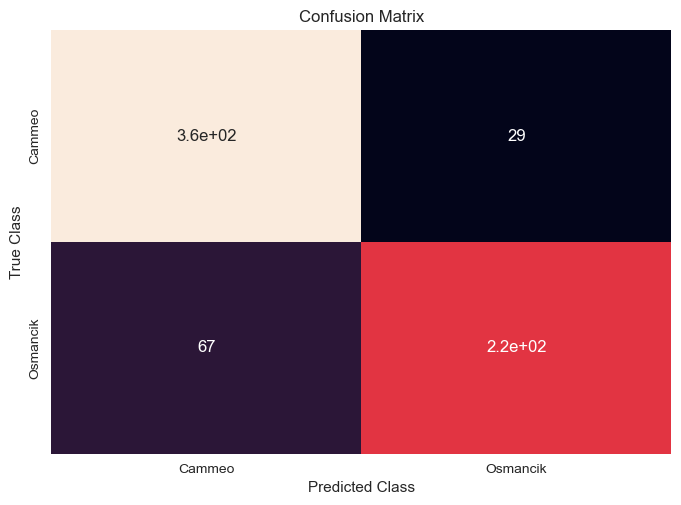

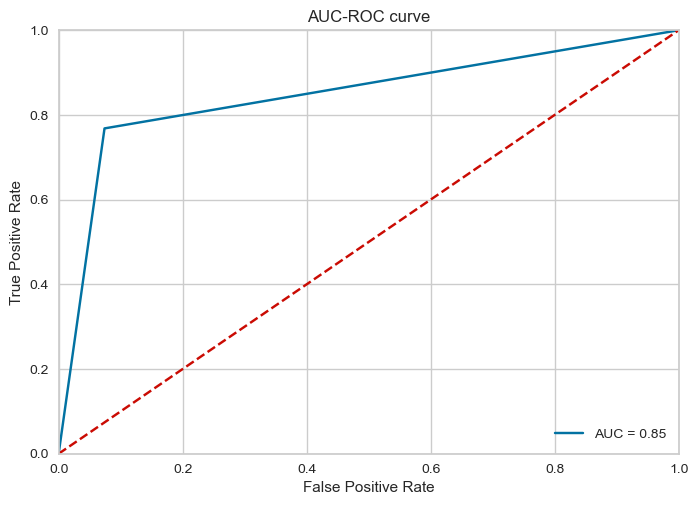

[0.86637298 0.88839941 0.87518355 0.88088235 0.87352941]
Mean:  0.8768735423684892


In [65]:
KNN_train_and_prediction(x_train_std, y_train_std, x_test_std, y_test_std)
knn_cv_res_std = cross_validate_knn(dataset_without_outliers_sd)

KNN accuracy score :  0.8990825688073395


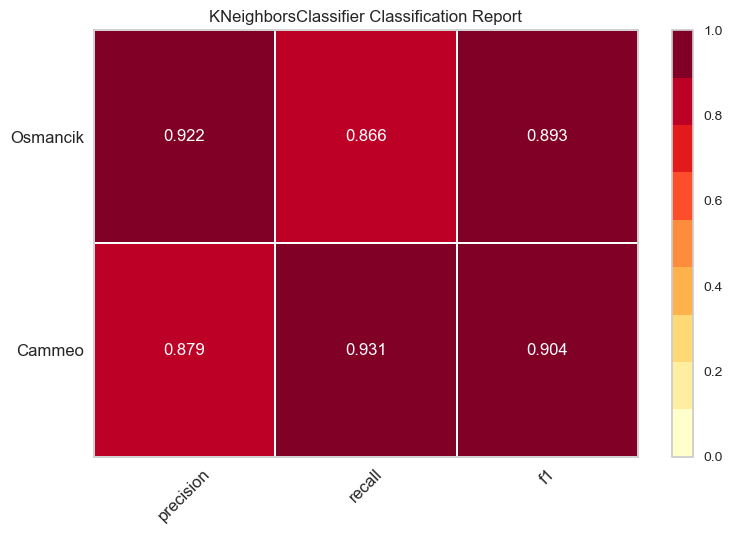

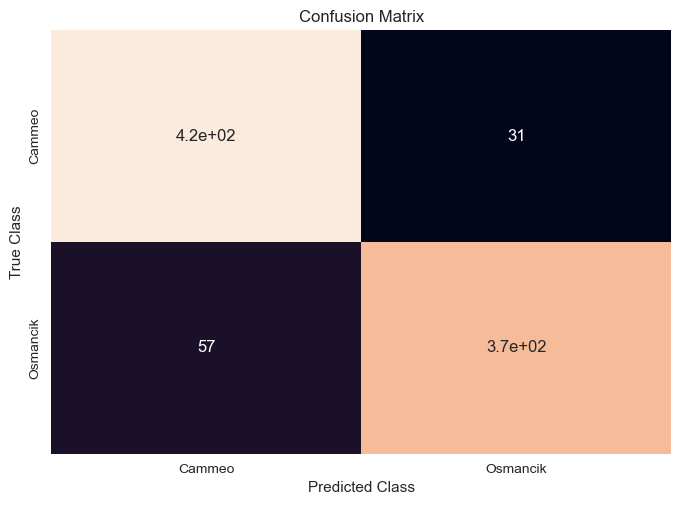

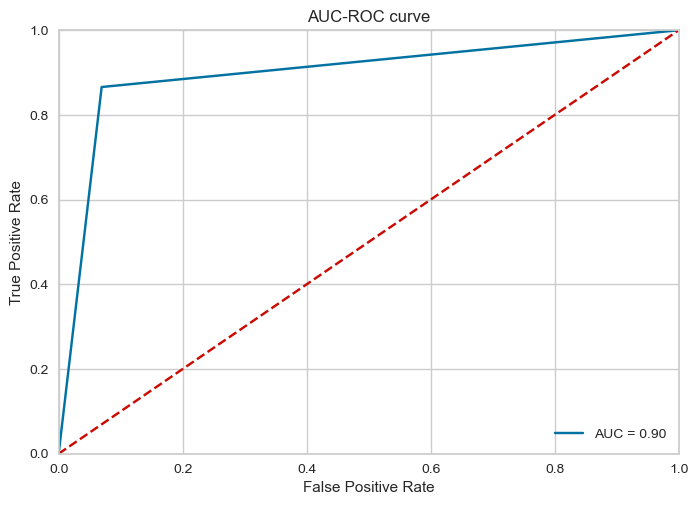

[0.91513761 0.90366972 0.91857798 0.91513761 0.92316514]
Mean:  0.9151376146788991


In [63]:
KNN_train_and_prediction(x_train_up, y_train_up, x_test_up, y_test_up)
knn_cv_res_upsampled = cross_validate_knn(dataset_upsampled)

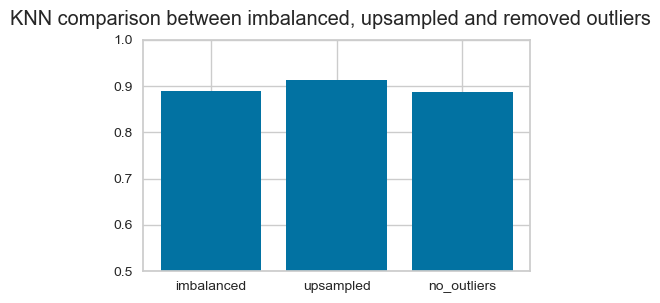

In [329]:
plt.figure(figsize=(5, 3))
plt.ylim(0.5, 1.00)
plt.bar(['imbalanced', 'no_outliers', 'no_outliers_std', 'upsampled'], [knn_cv_res_imbalanced, knn_cv_res_upsampled, knn_cv_res_no_outliers, knn])
plt.suptitle('KNN comparison between imbalanced, upsampled and removed outliers')
plt.show()

# Random forest

In [330]:
def Random_Forest_train_and_predict(x_train, y_train, x_test, y_test) :
    random_forest = RandomForestClassifier()
    pred = random_forest.fit(x_train, y_train).predict(x_test)
    print("Random forest accuracy : ",accuracy_score(y_test, pred, normalize = True))

    visualize_results(random_forest, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)


Random forest accuracy :  0.9186351706036745


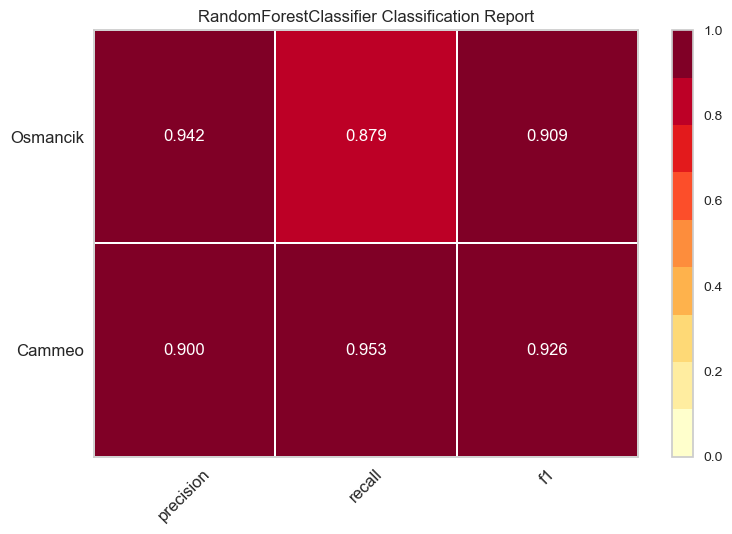

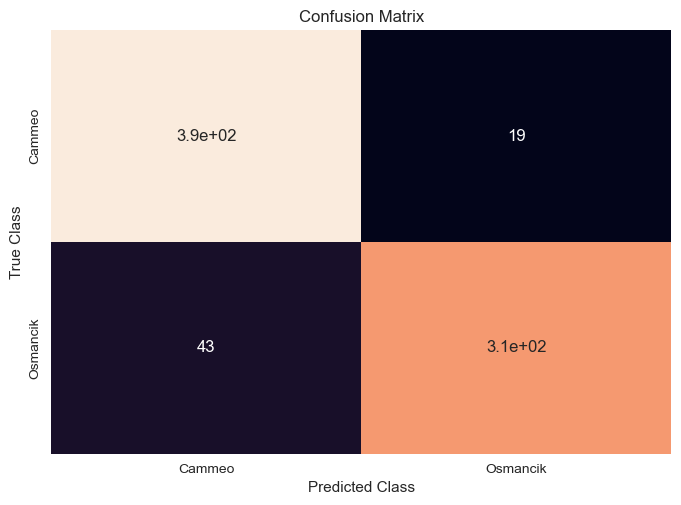

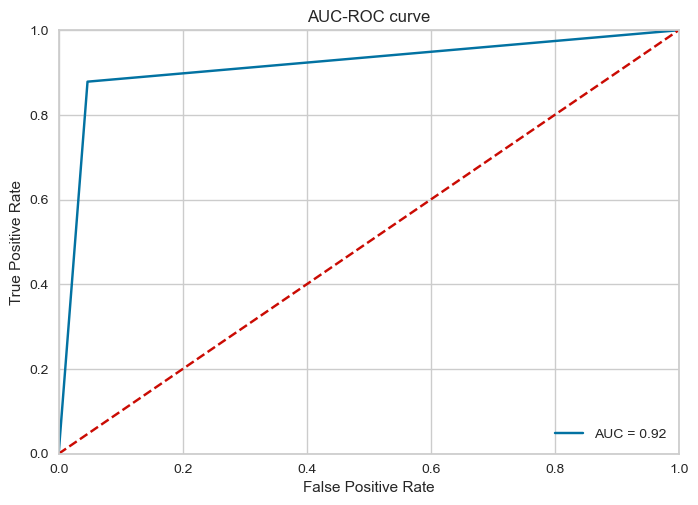

In [331]:
Random_Forest_train_and_predict(x_train_imbalanced, y_train_imbalanced, x_test_imbalanced, y_test_imbalanced)

Random forest accuracy :  0.9380733944954128


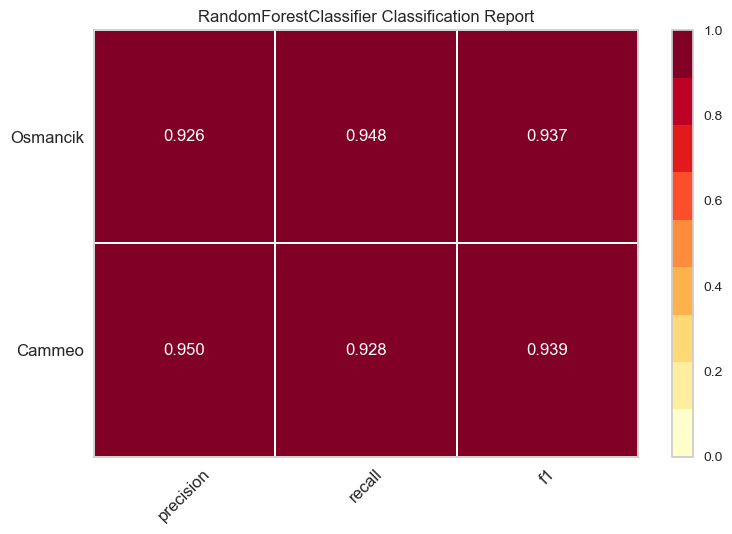

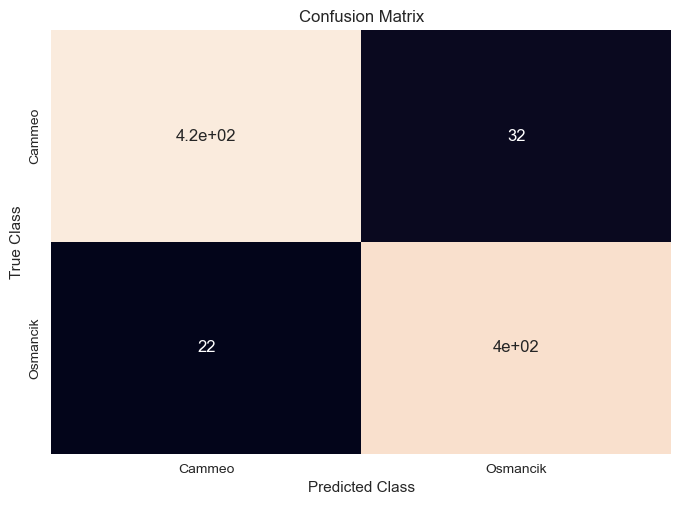

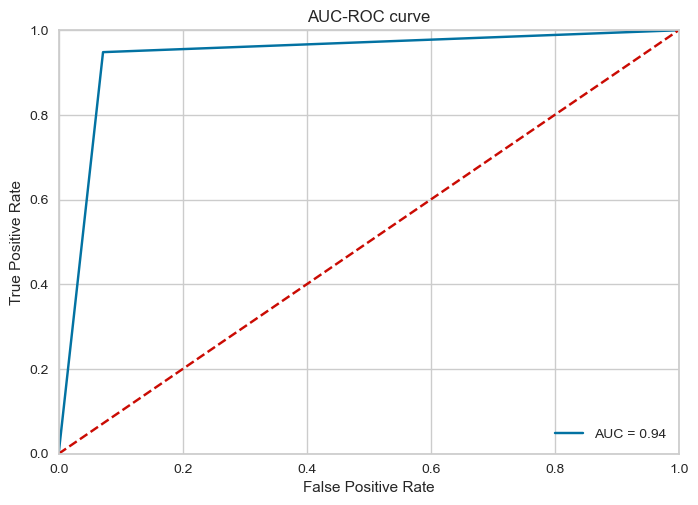

In [332]:
Random_Forest_train_and_predict(x_train_up, y_train_up, x_test_up, y_test_up)

Random forest accuracy :  0.9261744966442953


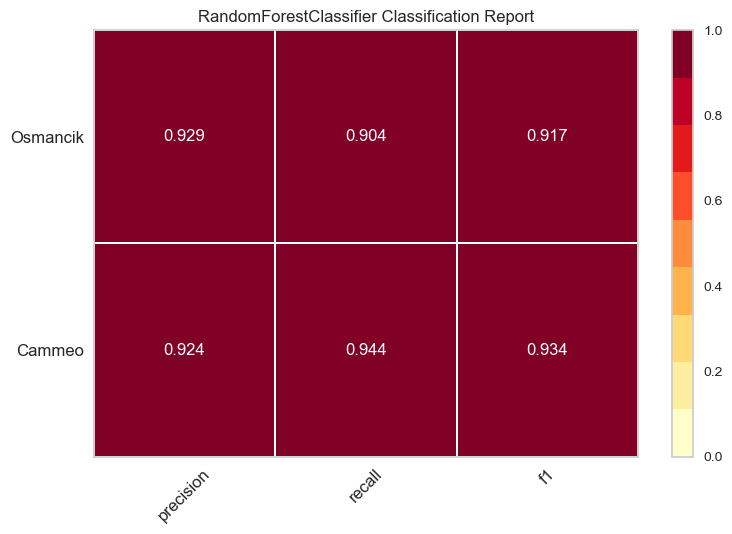

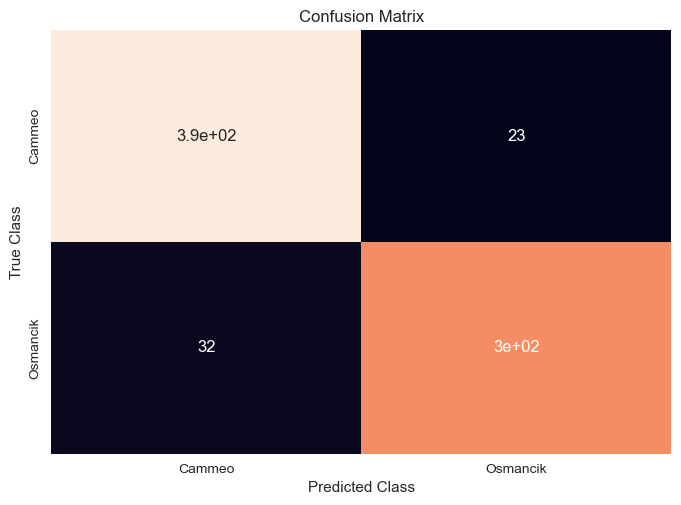

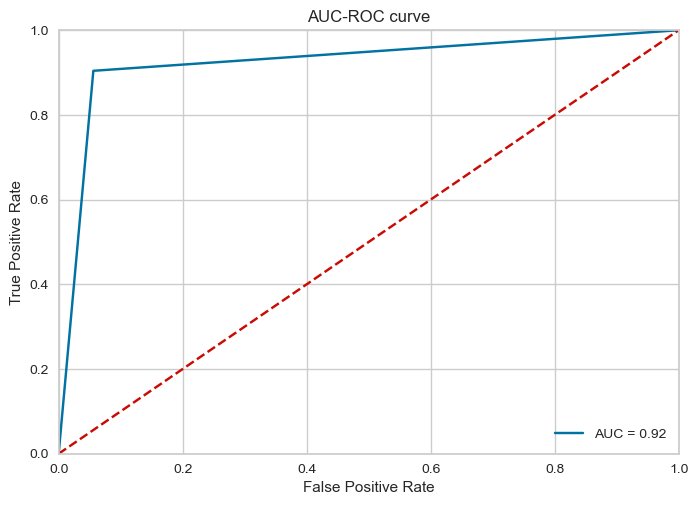

In [333]:
Random_Forest_train_and_predict(x_train_no_outl, y_train_no_outl, x_test_no_outl, y_test_no_outl)

Hiperparametri

In [334]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train_imbalanced, y_train_imbalanced)
    train_score[neighbor]=knn.score(x_train_imbalanced, y_train_imbalanced)
    test_score[neighbor]=knn.score(x_test_imbalanced, y_test_imbalanced)

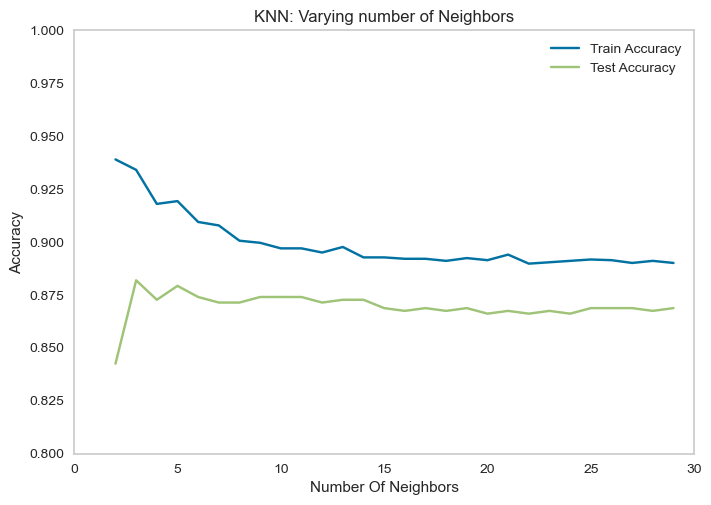

In [341]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 30)
plt.ylim(0.8, 1)
plt.grid()
plt.show()

In [338]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

3


In [473]:
from sklearn.model_selection import KFold, GridSearchCV 

kf = KFold(n_splits=10,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(x_train_imbalanced, y_train_imbalanced)
print(knn_cv.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'n_neighbors': 3}


In [474]:
from sklearn.metrics import accuracy_score as acc_score

knn2=KNeighborsClassifier(n_neighbors=3)
knn2.fit(x_train_imbalanced, y_train_imbalanced)
y_pred=knn2.predict(x_test_imbalanced)
acc=acc_score(y_test_imbalanced, y_pred)*100
print("Accuracy for testing dataset before tuning : {:.2f}%".format(imbalanced_acc*100))
print("Accuracy for testing dataset after tuning : {:.2f}%".format(acc))


Accuracy for testing dataset before tuning : 90.94%
Accuracy for testing dataset after tuning : 88.19%
